In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
medical = pd.read_csv('medical_examination.csv', index_col='id')  # Woe from Wit
medical.reset_index(inplace=True)
medical

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# Add 'bmi' and 'overweight' columns

bmi = medical['weight'] / (medical['height'] / 100) ** 2

medical['bmi'] = bmi.round(2)

overweight_true_filter = bmi > 25

overweight_false_filter = bmi <= 25

medical['overweight'] = None

medical.loc[overweight_true_filter, 'overweight'] = 1

medical.loc[overweight_false_filter, 'overweight'] = 0

medical['overweight'] = medical.overweight.astype('int')

In [4]:
# Normalize data
# Make 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

medical.loc[:, 'cholesterol'] = medical['cholesterol'].map({1: 0, 2: 1, 3: 1})
medical.loc[:, 'gluc'].replace({1: 0, 2: 1, 3: 1}, inplace=True)

print(medical['cholesterol'].value_counts(normalize=True))
medical['gluc'].value_counts(normalize=True)


0    0.748357
1    0.251643
Name: cholesterol, dtype: float64


0    0.8497
1    0.1503
Name: gluc, dtype: float64

## FIGURE 1 - categorical plot

In [5]:
# Draw Categorical Plot
def draw_cat_plot():
    
    # Create DataFrame for cat plot using `pd.melt` using just the values 
    # from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. 
    # Show the counts of each feature. 
    # You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = None

    # Draw the catplot with 'sns.catplot()'



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

In [6]:
subjective_features = ['smoke', 'alco', 'active']

examination_features = ['cholesterol', 'gluc', 'overweight']

target = 'cardio'

features = medical.loc[:, subjective_features + examination_features + [target]]
features

,smoke,alco,active,cholesterol,gluc,overweight,cardio
0,0,0,1,0,0,0,0
1,0,0,1,1,0,1,1
2,0,0,0,1,0,0,1
3,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,1,0,1,0,0,1,0
69996,0,0,1,1,1,1,1
69997,0,1,0,1,0,1,1
69998,0,0,0,0,1,1,1


In [7]:
melted = pd.melt(features, id_vars='cardio')
melted

,cardio,variable,value
0,0,smoke,0
1,1,smoke,0
2,1,smoke,0
3,1,smoke,0
4,0,smoke,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [8]:
# melted_0 = melted.loc[(melted.cardio == 0), :]
# melted_0

Text(0.5, 1.0, 'cardio = 1')

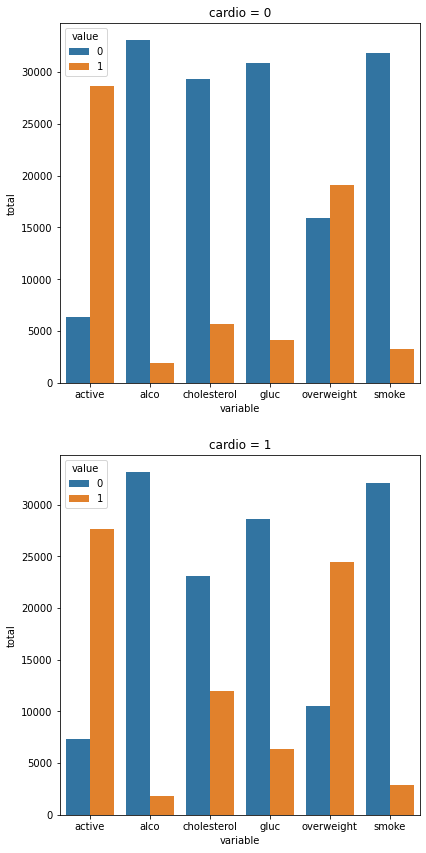

In [9]:
# 1
# sns.catplot(x='variable', hue='value', data=melted_0, kind='count')

# 2
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_axes([0, 0, 1, 0.5])
ax0 = fig.add_axes([0, 0.6, 1, 0.5])

cols = sorted(list(features.drop('cardio', axis=1).columns))
# sns.catplot(x='variable', hue='value', data=melted[melted.cardio == 0],
#             ax=ax1, 
#             kind='count', 
#             hue_order=(0, 1), 
#             order=cols)
sns.countplot(x='variable', hue='value', data=melted[melted.cardio == 0],
            ax=ax0,  
            hue_order=(0, 1), 
            order=cols)
sns.countplot(x='variable', hue='value', data=melted[melted.cardio == 1],
            ax=ax1,  
            hue_order=(0, 1), 
            order=cols)

ax0.set_ylabel('total')
ax1.set_ylabel('total')
ax0.set_title('cardio = 0')
ax1.set_title('cardio = 1')


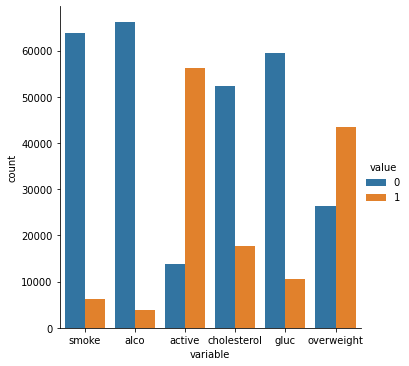

In [10]:
sns.catplot(x='variable', hue='value', data=melted, kind='count', legend_out=True)

##  Clean the data

Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [11]:
medical

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.97,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.93,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.51,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.71,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.93,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.47,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.35,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.10,1


In [12]:
diastolic_incorrect_filter = medical.ap_lo > medical.ap_hi
clean_res_1 = diastolic_incorrect_filter.sum()

too_short = medical.height < medical.height.quantile(0.025)
too_high = medical.height > medical.height.quantile(0.975)
height_incorrect_filter = too_short | too_high
clean_res_2 = height_incorrect_filter.sum()

too_light = medical.weight < medical.weight.quantile(0.025)
too_heavy = medical.weight > medical.weight.quantile(0.975)
weight_incorrect_filter = too_light | too_heavy
clean_res_3 = weight_incorrect_filter.sum()

incorrect_data_filter = diastolic_incorrect_filter | height_incorrect_filter | weight_incorrect_filter

print(f"{clean_res_1}, {clean_res_2}, {clean_res_3}")
print(f"Total incorrect records (overlapping): {incorrect_data_filter.sum()}")

medical_cleaned = medical.loc[~incorrect_data_filter, :]
medical_cleaned

1234, 2976, 3103
Total incorrect records (overlapping): 6741


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.97,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.93,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.51,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.71,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.66,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.38,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.93,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.10,1


In [13]:
# medical_cleaned['id'] = medical_cleaned.index.values
# medical_cleaned
medical_cleaned['id']

0            0
1            1
2            2
3            3
4            4
         ...  
69993    99991
69994    99992
69995    99993
69998    99998
69999    99999
Name: id, Length: 63259, dtype: int64

In [14]:
medical_cleaned

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.97,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.93,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.51,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.71,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.66,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.38,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.93,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.10,1


## Create a correlation matrix using the dataset. 

Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [15]:
# Draw Heat Map
def draw_heat_map(dataframe=medical):
    
    medical = dataframe.copy()
    
    # Clean the data
    diastolic_incorrect_filter = medical.ap_lo > medical.ap_hi

    too_short = medical.height < medical.height.quantile(0.025)
    too_high = medical.height > medical.height.quantile(0.975)
    height_incorrect_filter = too_short | too_high

    too_light = medical.weight < medical.weight.quantile(0.025)
    too_heavy = medical.weight > medical.weight.quantile(0.975)
    weight_incorrect_filter = too_light | too_heavy

    incorrect_data_filter = diastolic_incorrect_filter | height_incorrect_filter | weight_incorrect_filter

    medical_cleaned = medical.loc[~incorrect_data_filter, :]

    # Calculate the correlation matrix
    corr = medical_cleaned.drop('bmi', axis='columns').corr()

    # Generate a mask for the lower triangle and apply it to dataset
    corr_lower_trigngle_mask = np.tril(np.ones(corr.shape), k=-1).astype(bool)
    corr_lower_triangle = corr.where(corr_lower_trigngle_mask)

    # plot
    fig, axes = plt.subplots(figsize=(10, 8))
    # annotations = corr_lower_triangle.round(1)
    annotations = corr_lower_triangle.copy()
    sns.heatmap(corr_lower_triangle, ax=axes, 
                annot=annotations,
                cmap=None, 
                robust=True, 
                square=True, 
                linecolor='white', linewidths=0.6
                )

    fig.savefig('heatmap.png')

    return fig

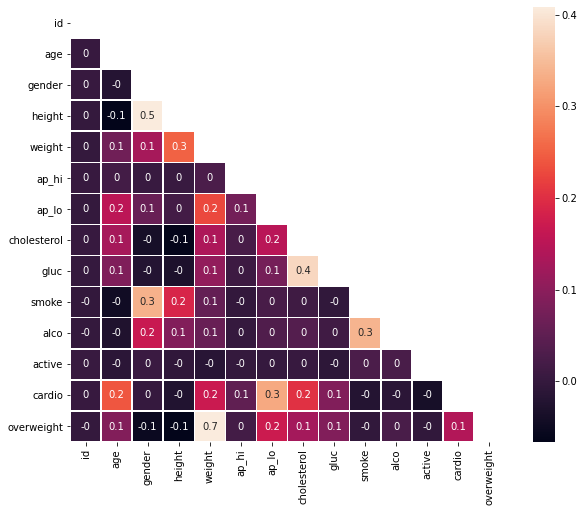

In [16]:
heatmap_fig = draw_heat_map()

In [34]:
corr = medical_cleaned.drop('bmi', axis='columns').corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [29]:
corr_lower_triangle_mask = np.tril(np.ones(corr.shape), k=-1).astype(bool)
corr_lower_triangle = corr.where(corr_lower_triangle_mask)
corr_lower_triangle

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.002507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,0.003426,-0.018132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,0.000326,-0.076932,0.505785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,0.000149,0.070168,0.129979,0.251503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,NaN,NaN,NaN,NaN,NaN,NaN
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

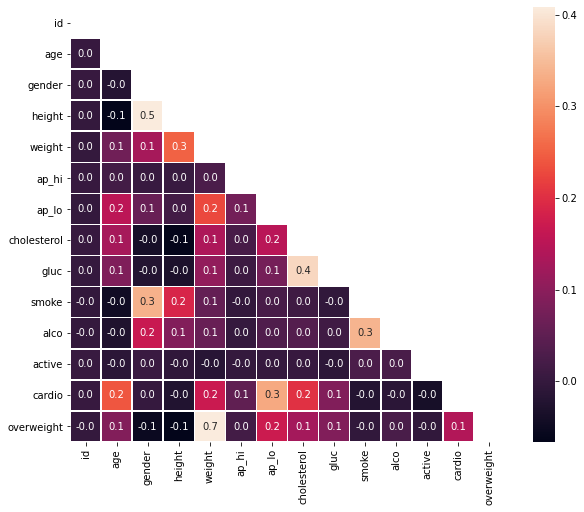

In [33]:
fig, axes = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_lower_triangle, ax=axes, 
            cmap=None, 
            robust=True, 
            annot=True, 
            fmt='.1f', 
            linecolor='white', linewidths=0.6, 
            square=True)


In [ ]:
(corr_lower_triangle > 0.5).astype('int')

In [ ]:
ones = np.ones(corr.shape)
ones

In [ ]:
ones_trilled = np.tril(ones)
ones_trilled

In [ ]:
ones_trilled = np.tril(ones, k=-1)
ones_trilled

In [ ]:
ones_trilled.astype(bool)

In [ ]:
bool  # funny staff

In [ ]:
min

## Count-plot By Hand

### Group by 'cardio'

In [ ]:
cardio_gr = features.groupby(['cardio'])
cardio_gr

In [ ]:
cardio_0 = cardio_gr.get_group(0)
cardio_0

In [ ]:
cardio_1 = cardio_gr.get_group(1)
cardio_1

### Melt

In [ ]:
melt_0 = pd.melt(cardio_0.drop(columns=['cardio']))
melt_0

In [ ]:
melt_1 = pd.melt(cardio_1.drop(columns=['cardio']))
melt_1

### Aggregation

**group by variable applying count (value count)  
or  
group by variable and value**

In [ ]:
agg_0 = melt_0.groupby(['variable', 'value'])
agg_0

In [ ]:
agg_0.agg(len)

In [ ]:
data_fig1 = agg_0.agg(len)
data_fig1.plot(kind='bar')